# Exploratory Data Analysis
- How many entries?
- How many images? How many scans? How many images without scans and vice verca? How many images per object? How many scans per object? (in percent as well)
- How many unique captions? How many missing values? How many pictures among those with missing labels? (in percent as well)  

Without blueprints: same

## Preparation

In [43]:
import pandas as pd
import numpy as np
from config.fucntions import columns_converter as cc


file_name = 'datasets/dataset_CLEAN_ver2.csv'
df = pd.read_csv(file_name, sep=';', encoding='utf-8')
df = df.drop(columns=['archive_links', 'microfiche_archive_links'])

file_name = 'config/variables/blueprint_prefixes.txt'
with open(file_name, 'r') as f:
    blueprint_prefixes  = f.read().splitlines()


In [40]:
df.head()

,id_record,id_persistent,label,image_links,microfiche_links
0,http://www.bildindex.de/document/obj20666124,http://id.bildindex.de/thing/0001618283,"Lauenhain (Kreis Hainichen), Fahnenträger eine...",[],['http://www.bildindex.de/bilder/d/mi12308g07']
1,http://www.bildindex.de/document/obj20727600,http://id.bildindex.de/thing/0001677732,Fenster (Bauelement),['http://www.bildindex.de/bilder/d/fm140030'],['http://www.bildindex.de/bilder/d/mi02117a05'...
2,http://www.bildindex.de/document/obj20943303,http://id.bildindex.de/thing/0001803584,"Kassel, Infanteriekasernen an der Königsstraße...",['http://www.bildindex.de/bilder/d/STMP_II_110...,[]
3,http://www.bildindex.de/document/obj20948462,http://id.bildindex.de/thing/0001806337,"Waldeck, Domäne, Wohnhaus, Umbauentwurf, Aufrisse",['http://www.bildindex.de/bilder/d/STMP_II_156...,[]
4,http://www.bildindex.de/document/obj20943569,http://id.bildindex.de/thing/0001803733,"Kassel, Opernhaus (Altes Hoftheater), Aborte i...",['http://www.bildindex.de/bilder/d/STMP_II_138...,[]


Converting strings in columns `image_links` and `microfiche_archive_links` back into lists of strings

In [41]:
# Took ~7 seconds
cc.strings_to_links(df, df.columns[3:])
df.head()

,id_record,id_persistent,label,image_links,microfiche_links
0,http://www.bildindex.de/document/obj20666124,http://id.bildindex.de/thing/0001618283,"Lauenhain (Kreis Hainichen), Fahnenträger eine...",[],[http://www.bildindex.de/bilder/d/mi12308g07]
1,http://www.bildindex.de/document/obj20727600,http://id.bildindex.de/thing/0001677732,Fenster (Bauelement),[http://www.bildindex.de/bilder/d/fm140030],"[http://www.bildindex.de/bilder/d/mi02117a05, ..."
2,http://www.bildindex.de/document/obj20943303,http://id.bildindex.de/thing/0001803584,"Kassel, Infanteriekasernen an der Königsstraße...",[http://www.bildindex.de/bilder/d/STMP_II_1108...,[]
3,http://www.bildindex.de/document/obj20948462,http://id.bildindex.de/thing/0001806337,"Waldeck, Domäne, Wohnhaus, Umbauentwurf, Aufrisse",[http://www.bildindex.de/bilder/d/STMP_II_1566...,[]
4,http://www.bildindex.de/document/obj20943569,http://id.bildindex.de/thing/0001803733,"Kassel, Opernhaus (Altes Hoftheater), Aborte i...",[http://www.bildindex.de/bilder/d/STMP_II_1383...,[]


## EDA


### Number of objects and files

In [42]:
N, M = df.shape[0], df.shape[1]

print(f'Amount of entries: {N}')
print(f'Columns ({M}): {df.columns}')

df.head(2)

Amount of entries: 38200
Columns (5): Index(['id_record', 'id_persistent', 'label', 'image_links',
       'microfiche_links'],
      dtype='object')


,id_record,id_persistent,label,image_links,microfiche_links
0,http://www.bildindex.de/document/obj20666124,http://id.bildindex.de/thing/0001618283,"Lauenhain (Kreis Hainichen), Fahnenträger eine...",[],[http://www.bildindex.de/bilder/d/mi12308g07]
1,http://www.bildindex.de/document/obj20727600,http://id.bildindex.de/thing/0001677732,Fenster (Bauelement),[http://www.bildindex.de/bilder/d/fm140030],"[http://www.bildindex.de/bilder/d/mi02117a05, ..."



| Column Name               | Type        | UNIQUE      | Description |
| -----------               | ----------- | ----------- | ----------- |
| `id_record`      | LINK        | NO          | A link to an object (e.g. set of papers of a book)       |
| `id_persistent`   | LINK        | YES         | A link to an subobject of an object (e.g. one sheet of paper from this book). Sometimes is similar to `record identifiers`       |
| `label`   | TEXT        | NO          |A label, text description |
| `image_links`   | SET OF LINKS        | YES (?)          |A set of links to download all coresponding images to this subobject (e.g. all sides of this sheet of paper in each link) |
| `microfiche_links`   | SET OF LINKS        | YES (?)          |A link to download pictures from archive. Probably there are scans of original objects, books, photos of sculptures with metadate on them. Could be used as a style transfer and metadata resourse, if it is not in the `identification labels` column |



In [44]:
def percent(n, N):
    return round(n/N*100, 2)


df_noblueprint = pd.DataFrame(columns=df.columns)
ind = np.array([], dtype=int)

for i in range(df.shape[0]):

    num_img = len(df.iloc[i].image_links)

    if num_img == 0 or any(prefix not in df.iloc[i].image_links[0] for prefix in blueprint_prefixes):
        ind = np.append(ind, i)

df_noblueprint = df.loc[ind]


N_img = df.image_links.apply(lambda x: len(x)).sum()
N_scn = df.microfiche_links.apply(lambda x: len(x)).sum()

a = df.image_links.apply(lambda x: bool(len(x)))
b = df.microfiche_links.apply(lambda x: bool(len(x)))

N_objimg_clean = df_noblueprint.image_links.apply(lambda x: bool(len(x))).sum()
N_img_clean = df_noblueprint.image_links.apply(lambda x: len(x)).sum()
N_objscan_clean = df_noblueprint.microfiche_links.apply(lambda x: bool(len(x))).sum()
N_scn_clean = df_noblueprint.microfiche_links.apply(lambda x: len(x)).sum()


In [45]:
sum_files = 0

for i in range(df.shape[0]):
    sum_files += len(df.iloc[i].microfiche_links)
    sum_files += len(df.iloc[i].image_links)

print(f'Overall files: {sum_files}')

Overall files: 93271


In [46]:
print(f'Objects: {N}')
print()
print(f'Objects with original image: {a.sum()} ({round(a.sum()/N*100,2)}%)')
print(f'Original images to download: {N_img}')
print(f'Objects with scans: {b.sum()} ({round(b.sum()/N*100,2)}%)')
print(f'Scans to download: {N_scn}')
print()
print(f'There are only original images or only scans: {(a^b).sum()} ({percent((a^b).sum(),N)}%)')
print(f'Both original images and scans: {(a&b).sum()} ({percent((a&b).sum(),N)}%)')
print(f'Only original images: {a.sum() - (a&b).sum()} ({percent(a.sum() - (a&b).sum(),N)}%)')
print(f'Only scans: {b.sum() - (a&b).sum()} ({percent(b.sum() - (a&b).sum(),N)}%)')
print()
print(f'Objects (no blueprints): {df_noblueprint.shape[0]} ({percent(df_noblueprint.shape[0],N)}%)')
print(f'Objects with original images (no blueprints): {N_objimg_clean} ({percent(N_objimg_clean,N)}%)')
print(f'Images to download (no blueprints): {N_img_clean} ({percent(N_img_clean,N_img)}%)')
print(f'Objects with scans (no blueprints): {N_objscan_clean} ({percent(N_objscan_clean,N)}%)')
print(f'Scans to download (no blueprints): {N_scn_clean} ({percent(N_scn_clean,N_scn)}%)')


Objects: 38200

Objects with original image: 21582 (56.5%)
Original images to download: 57096
Objects with scans: 17465 (45.72%)
Scans to download: 36175

There are only original images or only scans: 30377 (79.52%)
Both original images and scans: 4335 (11.35%)
Only original images: 17247 (45.15%)
Only scans: 13130 (34.37%)

Objects (no blueprints): 28142 (73.67%)
Objects with original images (no blueprints): 11524 (30.17%)
Images to download (no blueprints): 30377 (53.2%)
Objects with scans (no blueprints): 17460 (45.71%)
Scans to download (no blueprints): 36168 (99.98%)


In [47]:
sum_blueptints_obj = df.shape[0]-df_noblueprint.shape[0]
print(f'Objects (blueprints): {sum_blueptints_obj} ({round(sum_blueptints_obj/df.shape[0]*100,2)}%)')

Objects (blueprints): 10058 (26.33%)


In [52]:
sum_images_any = 0
sum_images_any_obj = 0

for i in range(df.shape[0]):
    if df.iloc[i].image_links != []:
        if any(prefix in df.iloc[i].image_links[0] for prefix in blueprint_prefixes):
            continue
        sum_images_any += len(df.iloc[i].image_links)
        sum_images_any_obj += 1
    else:
        if df.iloc[i].microfiche_links == []:
            continue
        if any(prefix in df.iloc[i].microfiche_links[0] for prefix in blueprint_prefixes):
            continue
        sum_images_any += len(df.iloc[i].microfiche_links)
        sum_images_any_obj += 1
print(f'Objects with images or at least scan (no blueprints): {sum_images_any_obj}')
print(f'Files with images or at least scan (no blueprints): {sum_images_any}')

Objects with images or at least scan (no blueprints): 24654
Files with images or at least scan (no blueprints): 48992


In [50]:
sum_scan_blueprint = 0

for i in range(df.shape[0]):
    if df.iloc[i].image_links != []:
        continue
    if df.iloc[i].microfiche_links == []:
        continue
    if any(prefix in df.iloc[i].microfiche_links[0] for prefix in blueprint_prefixes):
        sum_scan_blueprint += len(df.iloc[i].microfiche_links)
        print(df.iloc[i].microfiche_links)

print(f'Files with only scans of blueprints: {sum_scan_blueprint}')

Files with only scans of blueprints: 0


In [49]:
sum_blueprint = 0

for i in range(df.shape[0]):
    if df.iloc[i].image_links == []:
        continue
    if any(prefix in df.iloc[i].image_links[0] for prefix in blueprint_prefixes):
        sum_blueprint += len(df.iloc[i].image_links)

print(f'Original images of blueprints: {sum_blueprint} ({round(sum_blueprint/sum_files*100,2)}%)')

Original images of blueprints: 26719 (28.65%)


### Images per object

Average amount of pictures per object: 2.626829894700796
Median amount of pictures per object: 1.0
Max amount of pictures per object: 829
Min amount of pictures per object: 1
Frequencies: image_links
1      7652
2      2698
3       358
4       289
6       106
       ... 
80        1
57        1
209       1
79        1
829       1
Name: count, Length: 88, dtype: int64


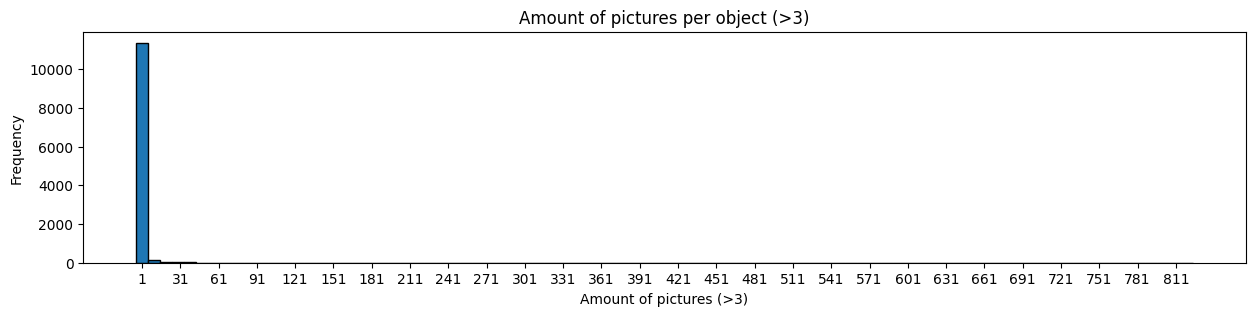

In [7]:
import matplotlib.pyplot as plt

image_freq = df_noblueprint.image_links.apply(lambda x: len(x))
image_freq = image_freq[image_freq > 0] 

print('Average amount of pictures per object:', image_freq.mean())
print('Median amount of pictures per object:', image_freq.median())
print('Max amount of pictures per object:', image_freq.max())
print('Min amount of pictures per object:', image_freq.min())
print('Frequencies:', image_freq.value_counts())

plt.figure(figsize=(15, 3))
plt.hist(image_freq, bins=len(image_freq.unique()), edgecolor='black', align='left')
plt.title('Amount of pictures per object (>3)')
plt.xlabel('Amount of pictures (>3)')
plt.ylabel('Frequency')
plt.xticks(range(min(image_freq), max(image_freq) + 1, 30))  
plt.show()

### Missing labels
There are some missing values in `id_persistent` as well, but they coincide with those, which have 'NO_LABEL' in labels. Also 'Ohne Titel' label is found, which is also (probably) a missing label

In [8]:
print('WHOLE DATASET')
missing_values = df[(df['label'] == 'NO_LABEL') | (df['label'] == 'Ohne Titel')]
print(f'Amount of missing labels: {missing_values.shape[0]} ({percent(missing_values.shape[0],N)}%)')
print(f'Images to download among them: {missing_values.image_links.apply(lambda x: len(x)).sum()} ({percent(missing_values.image_links.apply(lambda x: len(x)).sum(),N_img)}%)')
print(f'Scans to download among them: {missing_values.microfiche_links.apply(lambda x: len(x)).sum()}')
print()
print('WITHOUT BLUEPRINTS')
missing_values = df_noblueprint[(df_noblueprint['label'] == 'NO_LABEL') | (df_noblueprint['label'] == 'Ohne Titel')]
print(f'Amount of missing labels: {missing_values.shape[0]} ({round(missing_values.shape[0]/N*100,3)}%)')
print(f'Images to download among them: {missing_values.image_links.apply(lambda x: len(x)).sum()} ({percent(missing_values.image_links.apply(lambda x: len(x)).sum(),N_img_clean)}%)')
print(f'Scans to download among them: {missing_values.microfiche_links.apply(lambda x: len(x)).sum()}')
print()

WHOLE DATASET
Amount of missing labels: 62 (0.16%)
Images to download among them: 62 (0.11%)
Scans to download among them: 26

WITHOUT BLUEPRINTS
Amount of missing labels: 56 (0.147%)
Images to download among them: 49 (0.16%)
Scans to download among them: 26



All these objects could be deleted. Here is the code to download all of them to computer and check visually

In [9]:
# import img_downloader as imgd

# folder_name = 'missing_labels'
# imgd.create_folder(folder_name)

# k=0
# for i in missing_values.image_links:
#     if len(i):
#         for link in i:
#             save_path = f'{folder_name}/img-{k}.jpg'
#             imgd.download_image(link, save_path)
#             k+=1


In [11]:
print(f'Unique labels: {len(df.label.unique())}')
print(f'Unique labels (without blueprints): {len(df_noblueprint.label.unique())}')

unique_labels = df.label.value_counts()

print()
print('Frequency\t Label')
for i in range(len(unique_labels)):
    print(unique_labels[i], '\t\t', unique_labels.index[i])

Unique labels: 29102
Unique labels (without blueprints): 20163

Frequency	 Label
548 		 Wohnhaus
375 		 Wohn- und Geschäftshaus
350 		 Grabstein
135 		 Krug
106 		 Serie von Marburger Wandfliesen Serie von Marburger Wandfliesen/Fliese (visuelles Werk)
101 		 Bodenfliesen Bodenfliesen/Bodenfliese
100 		 Wandfliesengruppe Wandfliesengruppe/Wandfliese
92 		 Grabstein Grabstein/Rückseite
87 		 Grabstein Grabstein/Vorderseite
83 		 Negativ (Fotografie)
82 		 Kaffeekanne
75 		 Straße
74 		 Vase
70 		 Sogenannte Trümmerkampagne: Fotografen bei der Arbeit
68 		 Photographie: Das Gebirge "Hohe Tauern".
67 		 Teller
64 		 Schüssel
55 		 Ohne Titel
45 		 Photographie: Landschaft bei Semmering
43 		 Truhe
41 		 Photographie: Die Zillertaler Alpen
38 		 Fotostudie zu "Männer vor der Kirche"
38 		 []
37 		 Steinzeuggefäß
37 		 Kanne
37 		 Kachel
30 		 Selbstbildnis
30 		 Schlussstein
29 		 Landschaft
29 		 Kapitell
26 		 Photographie: Das Karwendelgebirge
26 		 Promotionsakte für Carl Justi
25 		 Sc